# Taller 1 de análisis de secuencias

#### En este taller se busca hacer uso de diferentes funciones bioinformaticas para obtener los archivos .fastq a partir de datos brutos .fast5 del fago lambda y obtener estadisticas generales de los resultados.

### 1. Obtener datos de secuenciación en formato .fast5 y .fastq

Para este paso se utilizó Albacore que permitió realizar un basecalling de archivos .fast5 tanto y generar de nuevo archivos .fastq. Para la instalación de Albacore en MacOS se usó el administrador conda para instalar en primer lugar Homebrew: `conda install homebrew` hombrew es un administrador que permite instalar Albacore. 

El sigiente paso para instalar Albacore es usar el comando `brew install @path` donde `@path` 
    corresponde a la ruta de acceso al paquete de albacore
    
Una vez instalado Albacore, se ejecuta el siguiende comando desde la terminal:
    
`read_fast5_basecaller.py -i /Users/camilogarcia/Desktop/5 -r -k SQK-RAD002 -f FLO-MIN106 -o fast5,fastq -t 1 -s /Users/camilogarcia/Desktop/Fastq-5/`


Para este ejercicio se realizó un basecalling de la carpeta 5 de reads del fago \lambda. En la anterior linea de comando son necesarios siempre los argumentos `- t` que se refiere al numero de núcleos por utilziar en la tarea `-k` que denota el kit de preparación de librería y `-f` que indica el tipo de celda que se uso durante la corrida.

El resutlado es una carpeta, que en este caso contiene tanto los archivos .fast5 como los .fastq


### 2. Installar `poretools` y obtener estadisticas de los reads

Para la instalación de `poretools` se usó el administrador Anaconda y se instalo el paquete en el ambiente por defecto con el comando: `conda install poretools`. Una primera idea de los datos se puede tener usando la función `stats`

In [1]:
!poretools stats -q /Users/camilogarcia/Desktop/Fastq-5/workspace/fail/0

/Users/camilogarcia/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
total reads	816
total base pairs	3561116
mean	4364.11
median	2544
min	163
max	30212
N25	14364
N50	7398
N75	4288


En el caso anterior se analizó la carpeta de archivos .fast5 que no fueron bien leídos durante el basecalling. En total esta carpeta registra 816 reads. 

In [24]:
directory='/Users/camilogarcia/Desktop/Fastq-5/workspace/pass/0'

In [17]:
!poretools stats -q $directory

/Users/camilogarcia/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
total reads	2012
total base pairs	10594471
mean	5265.64
median	3657
min	249
max	46289
N25	15877
N50	8681
N75	4949


En este caso se obtuviero 2012 reads que pasaron el control de calidad (?).

In [31]:
!poretools readstats -q $directory > readstats-camilo.txt

/Users/camilogarcia/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


El archivo se crea justo en la carpeta externa del presente cuaderno.

In [29]:
!wc -l readstats.txt

    2013 readstats.txt


In [33]:
!head -10 readstats-camilo.txt

start_time	channel_number	read_number	template_events	complement_events
1480018401	108	39	0	0
1480020188	263	268	0	0
1480021259	351	184	0	0
1480018647	507	49	0	0
1480021858	210	176	0	0
1480022636	181	339	0	0
1480024226	253	303	0	0
1480019709	499	80	0	0
1480023785	115	296	0	0


In [1]:
%load_ext rpy2.ipython

In [12]:
%R stats=read.table("readstats-camilo.txt", sep="\t")
%R head(stats)


,V1,V2,V3,V4,V5
1,start_time,channel_number,read_number,template_events,complement_events
2,1480018401,108,39,0,0
3,1480020188,263,268,0,0
4,1480021259,351,184,0,0
5,1480018647,507,49,0,0
6,1480021858,210,176,0,0


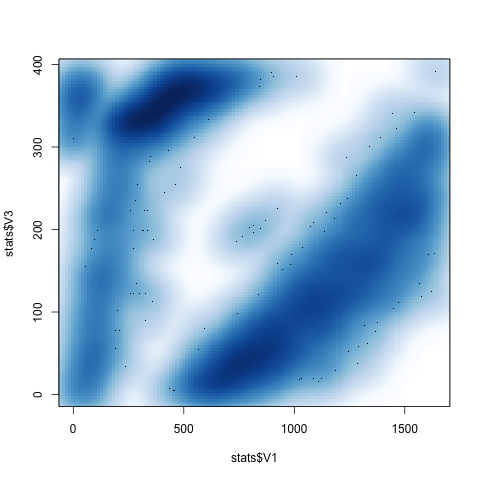

In [14]:
%R smoothScatter(stats$V1,stats$V3)

In [19]:
!poretools hist --theme-bw $directory

/Users/camilogarcia/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
usage: poretools hist [-h] [-q] [--min-length MIN_LENGTH]
                      [--max-length MAX_LENGTH] [--num-bins NUM_BINS]
                      [--saveas STRING] [--theme-bw] [--watch]
                      FILES [FILES ...]
poretools hist: error: too few arguments


In [13]:
!poretools hist -h

In [14]:
!poretools qualpos $directory

In [40]:
from poretools import Fast5FileSet
fast5s = Fast5FileSet('/Users/camilogarcia/Desktop/Fastq-5/workspace/pass/0') 
for fast5 in fast5s:
    start = fast5.get_start_time()
    porenum = fast5.get_channel_number() 
    fq = fast5.get_fastq()
    #print porenum, start, fq.seq, fq.qual 
    fast5.close()

In [39]:
from poretools import hist
for fast5 in fast5s:
    hist1 = fast5.hist()
    print hist1

### 3. Instalación de `poRe` y análisis de reads

Para instalar la librería de `PoRe` se siguieron las indicaciones del siguiente repositorio de Github: https://github.com/mw55309/poRe_docs/blob/master/01_Installation.md


In [2]:
library(poRe)
library(grid)

dir1 <- "/Users/camilogarcia/Desktop/Fastq-5/workspace/pass/0"
dir2 <- "/Users/camilogarcia/Desktop/Fastq-5/workspace/fail/0"



meta_pass <- read.fast5.info(dir1)
meta_fail <- read.fast5.info(dir2)

print(max(meta_pass$tlen))
print(max(meta_fail$tlen))



Loading required package: rhdf5
Loading required package: bit64
Loading required package: bit
Attaching package bit
package:bit (c) 2008-2012 Jens Oehlschlaegel (GPL-2)
creators: bit bitwhich
coercion: as.logical as.integer as.bit as.bitwhich which
operator: ! & | xor != ==
querying: print length any all min max range sum summary
bit access: length<- [ [<- [[ [[<-
for more help type ?bit

Attaching package: ‘bit’

The following object is masked from ‘package:base’:

    xor

Attaching package bit64
package:bit64 (c) 2011-2012 Jens Oehlschlaegel
creators: integer64 seq :
coercion: as.integer64 as.vector as.logical as.integer as.double as.character as.bin
logical operator: ! & | xor != == < <= >= >
arithmetic operator: + - * / %/% %% ^
math: sign abs sqrt log log2 log10
math: floor ceiling trunc round
querying: is.integer64 is.vector [is.atomic} [length] format print str
values: is.na is.nan is.finite is.infinite
aggregation: any all min max range sum prod
cumulation: diff cummin cummax 

[1] 49462
[1] 33086


In [42]:
library(tidyverse)
library(grDevices)

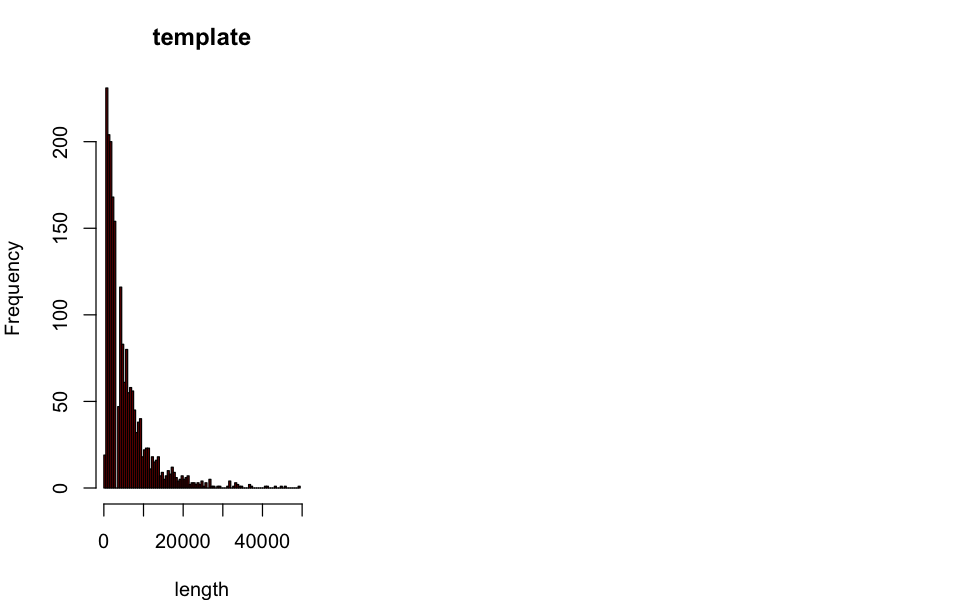

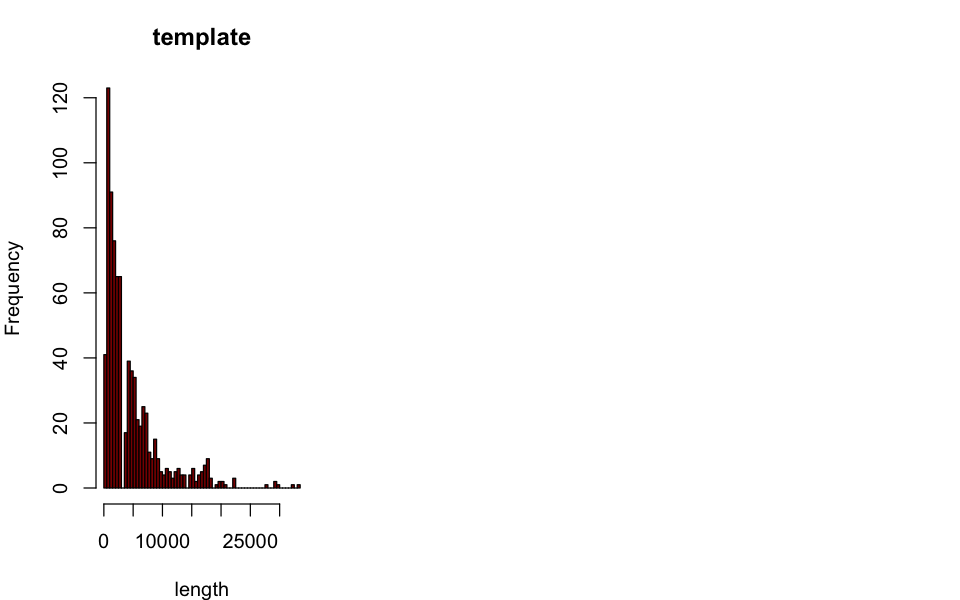

In [4]:
options(repr.plot.width = 8, repr.plot.height = 5)


p1 <- plot.length.histogram(meta_pass) 
p2 <- plot.length.histogram(meta_fail)

#grid.arrange(p1, p2, ncol = 2)


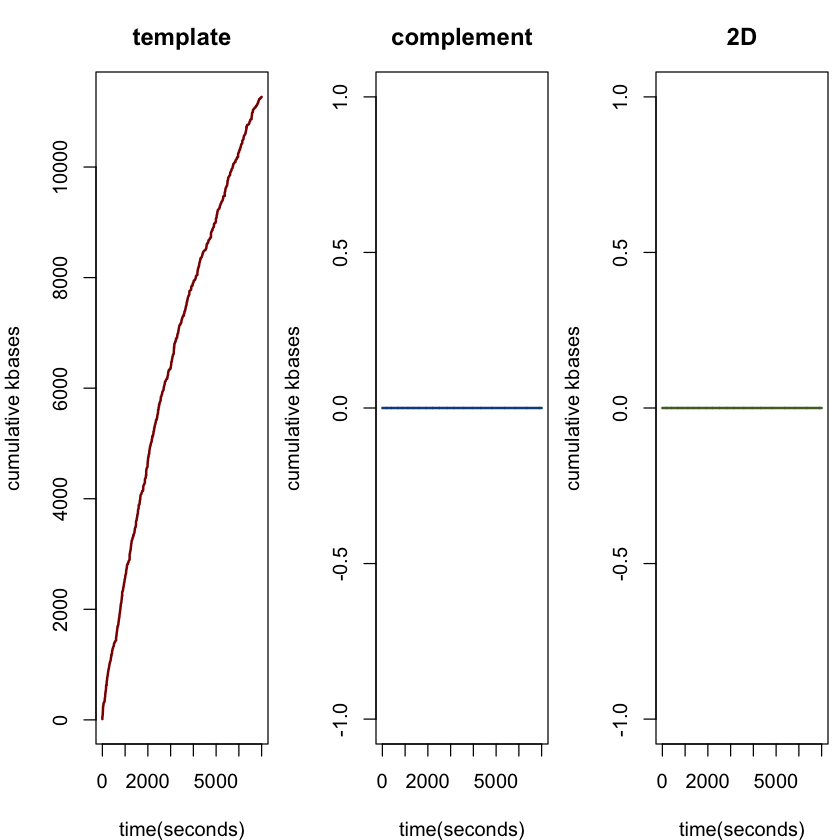

In [11]:
yield <- plot.cumulative.yield(meta)